# Cherry Blossoms!

If we travel back in time, [cherry blossoms](https://en.wikipedia.org/wiki/Cherry_blossom) were once in full bloom! We don't live in Japan or DC, but in non-COVID times we also have the [Brooklyn Botanic Garden's annual festival](https://www.bbg.org/visit/event/sakura_matsuri_2020).

We'll have to make up for it with data-driven cherry blossoms instead. Once upon a time [Data is Plural](https://tinyletter.com/data-is-plural) linked to [a dataset](http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/) about when the cherry trees blossom each year. It's completely out of date, but it's quirky in a real nice way so we're sticking with it.

## 0. Do all of your importing/setup stuff

In [1]:
import pandas as pd
from datetime import datetime, date
from dateutil import relativedelta

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

## 1. Read in the file using pandas, and look at the first five rows

* *Tip: You will probably need to pip install something to make this Excel file work!*

In [2]:
#!pip install xlrd

In [3]:
url = 'http://atmenv.envi.osakafu-u.ac.jp/omu-content/uploads/sites/1215/2015/10/KyotoFullFlower7.xls'

In [4]:
df = pd.read_excel(url)

In [5]:
df.head(5)

,"Full-flowering dates of Japanese cherry (Prunus jamasakura) at Kyoto, Japan. (Latest version, Jun. 12, 2012)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,This phenological data was acquired by followi...,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Column A; A.D.,NaN,NaN,NaN,NaN,NaN
3,Column B; Full-flowering date (day of year).,NaN,NaN,NaN,NaN,NaN
4,"Column C; Full-flowering date (calender date, ...",NaN,NaN,NaN,NaN,NaN


## 2. Read in the file using pandas CORRECTLY, and look at the first five rows

Hrm, how do your column names look? Read the file in again but this time add **a parameter to make sure your columns look right**. How can you tell pandas to skip rows?

**TIP: The first year should be 801 AD, and it should not have any dates or anything.**

In [6]:
#skip rows
df = pd.read_excel(url, skiprows=25)

## 3. Look at the final five rows of the data

In [7]:
df.head(5)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,-
1,802,NaN,NaN,NaN,NaN,-
2,803,NaN,NaN,NaN,NaN,-
3,804,NaN,NaN,NaN,NaN,-
4,805,NaN,NaN,NaN,NaN,-


## 4. Add some NaN values

It looks like you should have NaN/missing values in the beginning of the dataset under "Reference name." Read in the file *one more time*, this time making sure all of those missing reference names actually show up as `NaN` instead of `-`.

* *Tip: it's another open with reading in the file!*

In [8]:
df = pd.read_excel(url, skiprows=25, na_values='-', dtype={'Full-flowering date':str})

In [9]:
df.columns = df.columns.str.lower().str.replace('[(|)|-]','', regex=True).str.replace(' ','_')

## 5. What reference is the most commonly used when figuring out cherry blossom flowering dates?

If the first result is `"-"`, you need to redo the last question.

In [10]:
df.reference_name.value_counts().head(5)

NEWS-PAPER(ARASHIYAMA)        94
SUGIURAKE-NIKKI               38
MYOHOIN-HINAMIKI              32
OYUDONONO-UENO-NIKKI          26
OYUDONONO-UENO-NIKKI [EDA]    21
Name: reference_name, dtype: int64

## 6. Filter the list to only include columns where the `Full-flowering date (DOY)` is not missing

In [11]:
df = df[df.fullflowering_date_doy.notnull()]

## 6.5 Confirm you now have 827 rows

In [12]:
df[df.fullflowering_date_doy.notnull()].shape

(827, 6)

## 7. Make a histogram of the full-flowering date

In [13]:
df['date_string'] = pd.to_datetime(df.fullflowering_date,format='%m%d').dt.strftime('%m-%d')

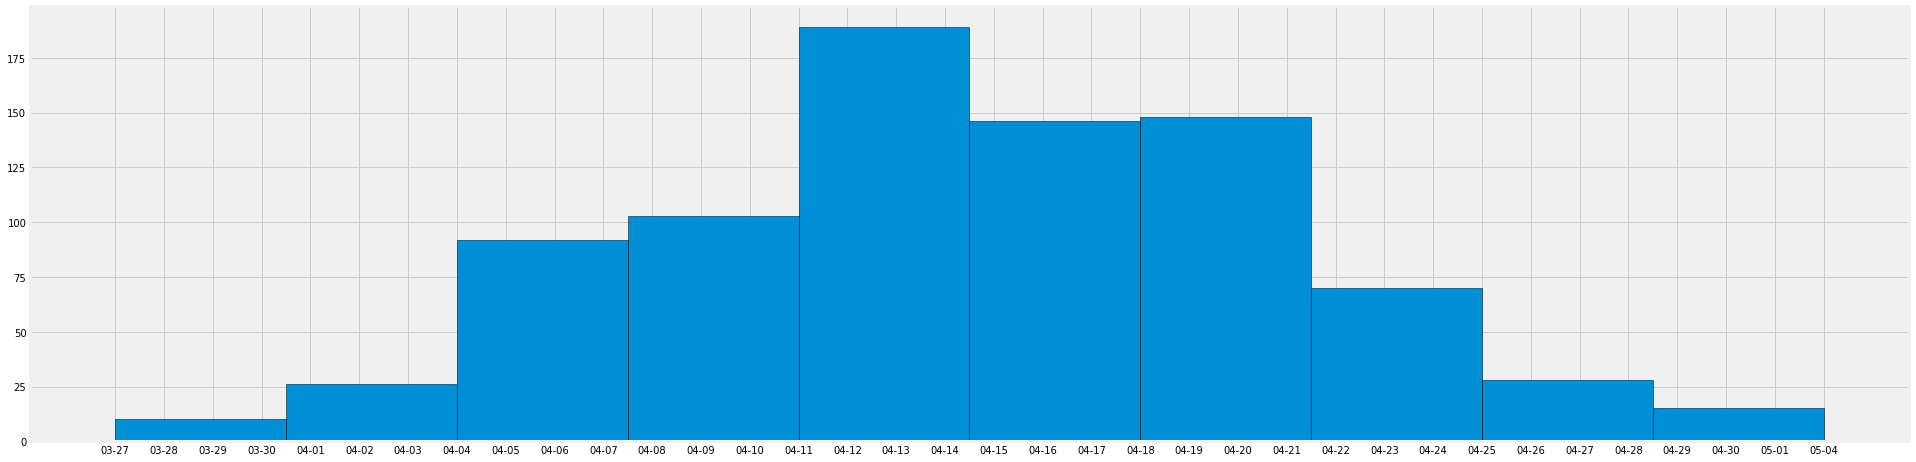

In [14]:
df.date_string.dropna().sort_values().hist(figsize=(30,8), ec='k')
plt.show()

## 8. Make another histogram of the full-flowering date, but with 39 bins instead of 10

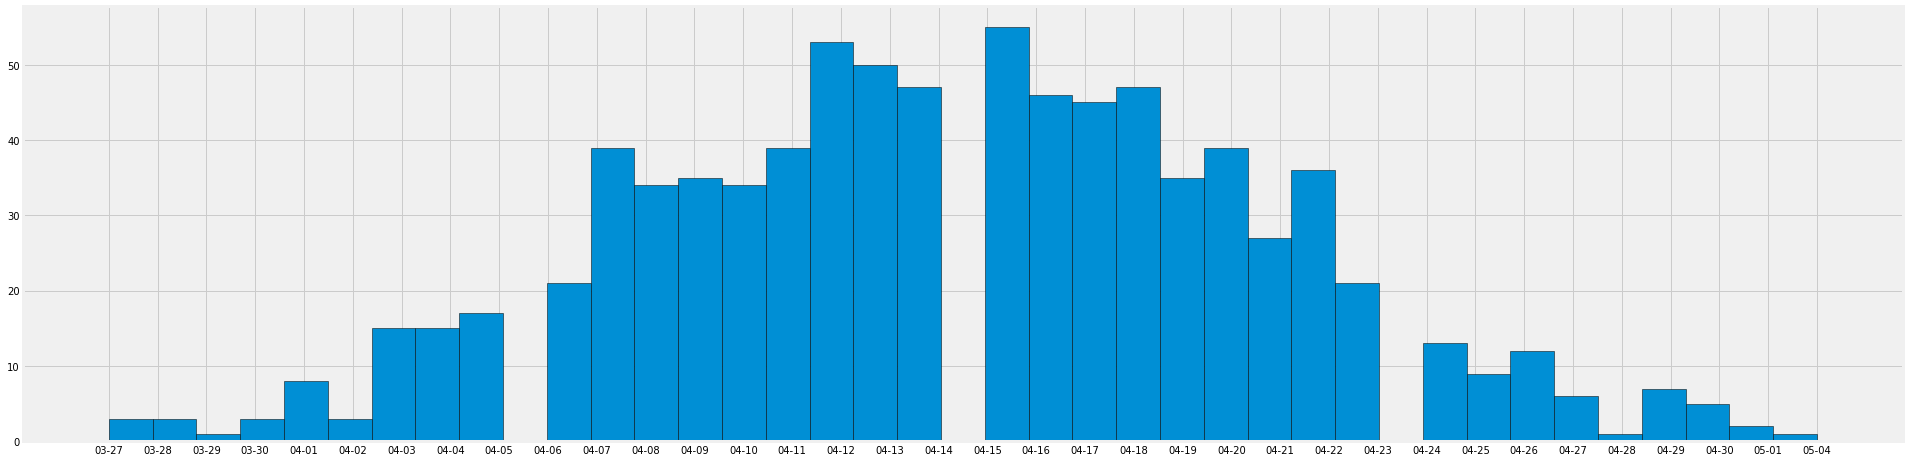

In [15]:
df.date_string.dropna().sort_values().hist(figsize=(30,8), bins=39, ec='k')
plt.show()

## 9. What's the average number of days it takes for the flowers to blossom? And how many records do we have?

Answer these both with one line of code.

In [16]:
#average is 105 days
#we have 827 records
df.fullflowering_date_doy.describe()

count    827.000000
mean     104.540508
std        6.407036
min       86.000000
25%      100.000000
50%      105.000000
75%      109.000000
max      124.000000
Name: fullflowering_date_doy, dtype: float64

## 10. What's the average days into the year cherry flowers normally blossomed before 1900?



In [17]:
df[df.ad<1900].fullflowering_date_doy.median()

105.0

## 11. How about after 1900?

In [18]:
df[df.ad>=1900].fullflowering_date_doy.median()

99.0

## 12. How many times was our data from a title in Japanese poetry?

You'll need to read the documentation inside of the Excel file.

In [19]:
#TYPE : Data type, which shows priority for phenological data presition
       #0 : data from modern times (full-bloom date since 1880s)
       #1 : from diary description about full-bloom
       #2 : from diary description about cherry blossom viewing party
       #3 : from diary description about presents of cherry twigs from party participants
       #4 : title in Japanese poety
       #8 : estimated by full-flowering dates of wisteria
       #9 : estimated by full-flowering dates of Japanese kerria

In [20]:
(df.data_type_code==4).sum()

39

## 13. Display the rows where our data was from a title in Japanese poetry

In [21]:
pd.options.display.max_rows = None

In [22]:
df.query("data_type_code==4")

,ad,fullflowering_date_doy,fullflowering_date,source_code,data_type_code,reference_name,date_string
90,891,109.0,419,5.0,4.0,NIHONKIRYAKU,04-19
94,895,104.0,414,5.0,4.0,NIHONKIRYAKU,04-14
95,896,104.0,413,5.0,4.0,NIPPON-SANDAI-JITSUROKU,04-13
122,923,104.0,414,5.0,4.0,ZOKU-KOKIN-WAKASHU,04-14
154,955,89.0,330,5.0,4.0,SHUISHO,03-30
168,969,98.0,408,5.0,4.0,NIHONKIRYAKU,04-08
206,1007,106.0,416,5.0,4.0,MIDO-KAMPAKUKI,04-16
232,1033,102.0,412,5.0,4.0,NIHONKIRYAKU,04-12
235,1036,104.0,413,5.0,4.0,NIHONKIRYAKU,04-13
259,1060,108.0,417,5.0,4.0,SHIN-SENZAI-WAKASHU,04-17


## 14. Graph the full-flowering date (DOY) over time

<AxesSubplot:xlabel='ad'>

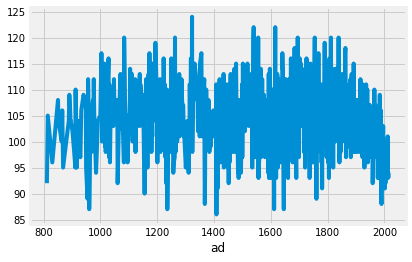

In [23]:
df.set_index('ad').sort_index().fullflowering_date_doy.plot()

## 15. Smooth out the graph

It's so jagged! You can use `df.rolling` to calculate a rolling average.

The following code calculates a **10-year mean**, using the `AD` column as the anchor. If there aren't 20 samples to work with in a row, it'll accept down to 5. Neat, right?

(We're only looking at the final 5)

In [24]:
df.rolling(10, on='ad', min_periods=5).fullflowering_date_doy.mean().tail()

1210    95.9
1211    96.9
1212    96.4
1213    96.6
1214    96.0
Name: fullflowering_date_doy, dtype: float64

Use the code above to create a new column called `rolling_date` in our dataset. It should be the 20-year rolling average of the flowering date. Then plot it, with the year on the x axis and the day of the year on the y axis.

Try adding `ylim=(80, 120)` to your `.plot` command to make things look a little less dire.

In [25]:
df['rolling_date'] = df.rolling(20, on='ad', min_periods=5).fullflowering_date_doy.mean()

<AxesSubplot:xlabel='ad'>

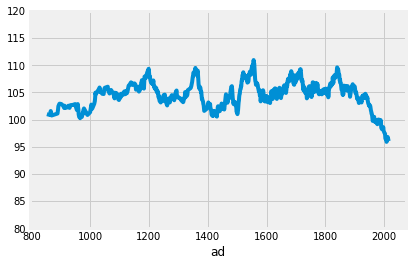

In [26]:
df.set_index('ad').rolling_date.plot(ylim=(80,120))

## 16. Add a month column

Right now the "Full-flowering date" column is pretty rough. It uses numbers like '402' to mean "April 2nd" and "416" to mean "April 16th." Let's make a column to explain what month it happened in.

* Every row that happened in April should have 'April' in the `month` column.
* Every row that happened in March should have 'March' as the `month` column.
* Every row that happened in May should have 'May' as the `month` column.

There are **at least two ways to do this.**

#### WAY ONE: The bad-yet-simple way

If you don't want to use `pd.to_datetime`, you can use this as an sample for updating March. It finds everything with a date less than 400 and assigns `March` to the `month` column:

```python
df.loc[df['Full-flowering date'] < 400, 'month'] = 'March'
```

#### WAY TWO: The good-yet-complicated way

* When you use `pd.to_datetime`, if pandas doesn't figure it out automatically you can also pass a `format=` argument that explains what the format is of the datetime. You use [the codes here](https://strftime.org/) to mark out where the days, months, etc are. For example, `2020-04-09` would be converted using `pd.to_datetime(df.colname, "format='%Y-%m-%d")`.
* `errors='coerce'` will return `NaN` for missing values. By default it just yells "I don't know what to do!!!"
* And remember how we used `df.date_column.dt.month` to get the number of the month? For the name, you use `dt.strftime` (string-formatted-time), and pass it [the same codes](https://strftime.org/) to tell it what to do. For example, `df.date_column.dt.strftime("%Y-%m-%d")` would give you `"2020-04-09"`.

In [27]:
df['month'] =pd.to_datetime(df.fullflowering_date, format="%m%d", errors="coerce").dt.strftime('%B')

## 17. Using your new column, how many blossomings happened in each month?

In [28]:
#sort order
months = ['March', 'April', 'May']

In [29]:
df.month.value_counts()[months]

March     10
April    814
May        3
Name: month, dtype: int64

## 18. Make a bar graph of how many blossomings happened in each month.

<AxesSubplot:>

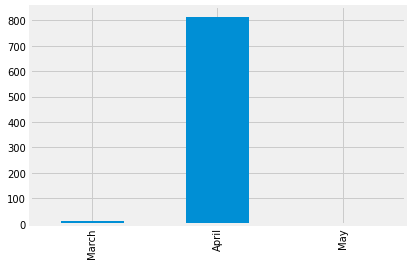

In [30]:
df.month.value_counts()[months].plot(kind='bar')

## 19. Adding a day-of-month column

Now we're going to add a new column called `day_of_month.`

*Tip: If you didn't drop the rows missing full-flowering dates earlier, it will yell at you about missing data. Go back up and fix Number 6!*

In [31]:
df['day_of_month'] = pd.to_datetime(df.fullflowering_date, format="%m%d", errors="coerce").dt.strftime('%d').astype(int)

## 20. Adding a date column

If you don't have a nice-looking date column yet, take the `'month'` and `'day_of_month'` columns and combine them in order to create a new column called `'date'`. By "nice looking," I mean it should say something like `April 11`.

* Instead of using the two existing columns, you could learn to use `.dt.strftime` as mentioned above.

In [32]:
df['date'] = pd.to_datetime(df.fullflowering_date, format="%m%d", errors="coerce").dt.strftime('%B %d')

## 21. What day of the week do cherry blossoms like to blossom on?

Do they get the weekends off?

In [33]:
#month number
df['month_number'] = df.month.apply(lambda x: datetime.strptime(x, '%B').month)

In [34]:
#not working
#years are too old...?
#df['day_of_week'] = pd.to_datetime(df[['ad','month_number','day_of_month']]).dt.strftime('%A')

In [35]:
#Use datetime instead.....
df['day_of_week'] = df[['ad','month_number','day_of_month']].apply(lambda x: date(x[0], x[1], x[2]).strftime('%A'), axis=1)

In [36]:
#Yes! We get to see cherry blossoms on weekends!
df.day_of_week.value_counts()

Sunday       144
Thursday     132
Friday       121
Tuesday      114
Wednesday    106
Monday       105
Saturday     105
Name: day_of_week, dtype: int64

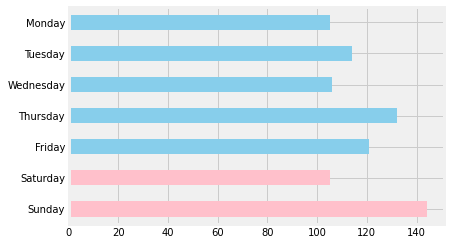

In [37]:
#graph
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
colors = ['skyblue'] * 5 + ['pink'] *2

df.day_of_week.value_counts()[days].plot(kind='barh',color=colors).invert_yaxis()

# YOU ARE DONE.

And **incredible.**

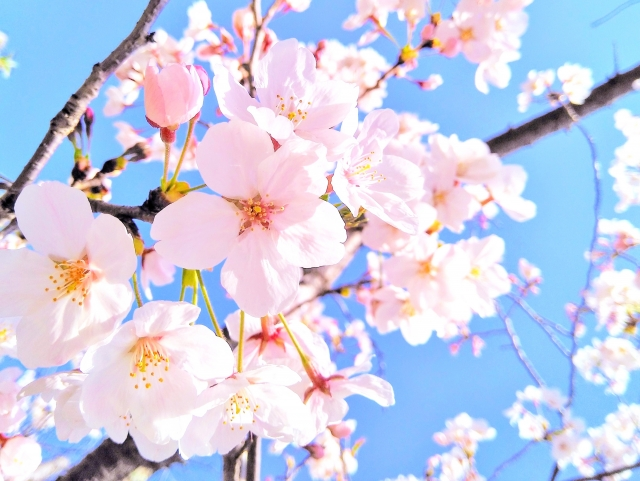